# 12-1 datetime 오브젝트 사용하기 (1/11/2019)

In [1]:
from datetime import datetime

### now와 today 메서드를 사용하면 현재 시간을 출력할 수 있다.

In [2]:
now1 = datetime.now()
print(now1)

2019-01-19 15:35:48.826462


In [3]:
now2 = datetime.today()
print(now2)

2019-01-19 15:35:48.855485


### 직접 시간을 입력하여 만들 수도 있다.

In [4]:
t1 = datetime.now()
t2 = datetime(1994,4,24)
t3 = datetime(1994,4,24,20,24,59)

print(t1)
print(t2)
print(t3)

2019-01-19 15:35:48.876499
1994-04-24 00:00:00
1994-04-24 20:24:59


### 시간 계산도 할 수 있다.

In [5]:
diff1 = t1 - t2
print(diff1)

9036 days, 15:35:48.876499


# 문자열을 datetime 오브젝트로 변환하기 - to_datetime메서드

In [6]:
import pandas as pd
import os
ebola = pd.read_csv('../data/country_timeseries.csv')

### Date 열이 문자열로 저장되어 있다.

In [7]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: float64(16), int64(1), object(1)
memory usage: 17.2+ KB


### to_datetime 메서드를 사용하면 Date 열의 자료형을 datetime 오브젝트로 변환할 수 있다.

In [8]:
pd.to_datetime(ebola['Date'])
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: float64(16), int64(1), object(1)
memory usage: 17.2+ KB


### 시간 형식 지정자(%d, %m, %y) 사용해보기

In [9]:
test_df1 = pd.DataFrame({'order_day':['01/01/19', '02/01/19', '03/01/19']})

test_df1['%d/%m/%y'] = pd.to_datetime(test_df1['order_day'], format='%d/%m/%y')
test_df1['%m/%d/%y'] = pd.to_datetime(test_df1['order_day'], format='%m/%d/%y')
test_df1['%y/%m/%d'] = pd.to_datetime(test_df1['order_day'], format='%y/%m/%d')

test_df1

,order_day,%d/%m/%y,%m/%d/%y,%y/%m/%d
0,01/01/19,2019-01-01,2019-01-01,2001-01-19
1,02/01/19,2019-01-02,2019-02-01,2002-01-19
2,03/01/19,2019-01-03,2019-03-01,2003-01-19


# datetime 오브젝트로 변환하기 - read_csv 메서드

### read_csv 메서드의 parse_dates인자에 datetime 오브젝트로 변환하고자 하는 열의 이름을 전달하면 더욱 편하게 변환할 수 있다.

In [10]:
ebola1 = pd.read_csv('../data/country_timeseries.csv', parse_dates=['Date'])
ebola1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null datetime64[ns]
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: datetime64[ns](1), float64(16), int64(1)
memory usage: 17.2 KB


### datetime 오브젝트에서 날짜 정보 추출하기

In [11]:
date_series = pd.Series(['2018-05-16', '2018-05-17', '2018-05-18'])
date_series

0    2018-05-16
1    2018-05-17
2    2018-05-18
dtype: object

In [12]:
date_series = pd.Series(['2018-05-16', '2018-05-17', '2018-05-18'])
d1 = pd.to_datetime(date_series)
d1

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]

##### datetime 오브젝트의 year, month, day 속성을 이용한다.

In [13]:
d1[0].year

2018

In [14]:
d1[0].month

5

In [15]:
d1[0].day

16

### dt 접근자를 사용해 편하게 추출하기

In [16]:
ebola = pd.read_csv("../data/country_timeseries.csv", parse_dates=['Date'])

In [17]:
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [18]:
ebola['year'] = ebola['Date'].dt.year
ebola[['Date', 'year']].head()

,Date,year
0,2015-01-05,2015
1,2015-01-04,2015
2,2015-01-03,2015
3,2015-01-02,2015
4,2014-12-31,2014


In [19]:
ebola['month'], ebola['day'] = (ebola['Date'].dt.month, ebola['Date'].dt.day)
ebola[['Date', 'year', 'month', 'day']].head()

,Date,year,month,day
0,2015-01-05,2015,1,5
1,2015-01-04,2015,1,4
2,2015-01-03,2015,1,3
3,2015-01-02,2015,1,2
4,2014-12-31,2014,12,31


In [20]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
Date                   122 non-null datetime64[ns]
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
year                   122 non-null int64
month                  122 non-null int64
day                    122 non

# 12-2 사례별 시계열 데이터 계산하기

In [21]:
ebola.iloc[-5:, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
117,2014-03-27,5,103.0,8.0,6.0
118,2014-03-26,4,86.0,NaN,NaN
119,2014-03-25,3,86.0,NaN,NaN
120,2014-03-24,2,86.0,NaN,NaN
121,2014-03-22,0,49.0,NaN,NaN


#### ebola의 최초 발병일 계산하기

In [22]:
ebola['Date'].min()

Timestamp('2014-03-22 00:00:00')

#### ebola의 진행정도

In [23]:
ebola['outbreak_day'] = ebola['Date'] - ebola['Date'].min()
ebola[['Date', 'outbreak_day']].head()

,Date,outbreak_day
0,2015-01-05,289 days
1,2015-01-04,288 days
2,2015-01-03,287 days
3,2015-01-02,286 days
4,2014-12-31,284 days


## 파산한 은행의 개수 계산하기

In [24]:
banks = pd.read_csv('../data/banklist.csv', parse_dates=[5,6])
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2017-12-20
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2017-10-20
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-12-05


### 파산한 은행의 분기와 년도 열 추가하기

In [25]:
banks['closing_quarter'], banks['closing_year'] = (banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,closing_quarter,closing_year
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2017-12-20,4,2017
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2017-10-20,4,2017
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26,2,2017
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26,2,2017
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-12-05,2,2017


### 연도별로 파산한 은행의 개수 구하기

In [26]:
banks.groupby('closing_year').size()

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64

### 각 연도별, 분기별로 파산한 은행의 개수 구하기

In [27]:
banks.groupby(['closing_year', 'closing_quarter']).size()

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

### 그래프로 그려보기

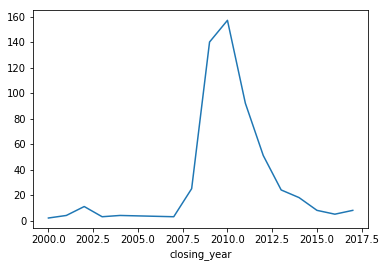

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

fog, ax = plt.subplots()

ax = banks.groupby('closing_year').size().plot()

(array([  6.,  14.,   4.,   0.,  28., 297.,  92.,  75.,  26.,  13.]),
 array([2000. , 2001.7, 2003.4, 2005.1, 2006.8, 2008.5, 2010.2, 2011.9,
        2013.6, 2015.3, 2017. ]),
 <a list of 10 Patch objects>)

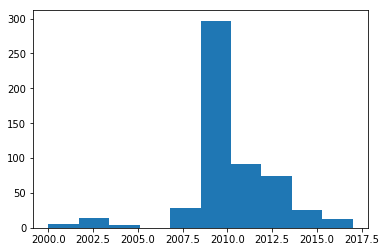

In [39]:
import seaborn as sns

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.hist(banks['closing_year'])

## 테슬라 주식 데이터로 시간 계산하기
### 왜 안되지...ㅠ

In [30]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as pdr

tesla = pdr.get_data_quandl('TSLA')
tesla.to_csv('../data/tesla_stock_quandl.csv')

ValueError: The Quandl API key must be provided either through the api_key variable or through the environmental variable QUANDL_API_KEY.